In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gaussians

In class, we derived (or will derive) the posterior and predictive distributions for a data point generated from a Gaussian-Gaussian model: having a Gaussian likelihood with unknown mean and known variance, and with a Gaussian prior on the mean of the likelihood with known mean and known variance. This model can be written in generative process notation \footnote{I try to use the following convention for variables: scalar variables are lowercase and italics (e.g., $x$), indices tend to be $n$, $t$, $c$ or $k$, the largest index is uppercase (e.g., $N$), vector variables are bold and lowercase (e.g., ${\bf x}$), and matrix variables are bold and uppercase (e.g., ${\bf X}$).} as:

$\mu \sim {\rm N}(\mu_0, \sigma^2_0)$
$x_1,\dotsc, x_N | \mu, \sigma_x^2 \overset{iid}{\sim} {\rm N}(\mu, \sigma^2_x)$

Remember that $iid$ means {\em independent} and {\em identically distributed} and the generative process notation $x | \mu, \sigma_x^2 \sim {\rm N}(\mu, \sigma_x^2)$ means that given the values of parameters $\mu$ and $\sigma_x^2$, $x$ is normally distributed with mean $\mu$ and variance $\sigma_x^2$. So, this means
$p(x|\mu,\sigma_x^2) = \frac{1}{\sigma_x \sqrt{2 \pi}} e^{-\frac{1}{2 \sigma_x^2}\left(x-\mu \right)^2}$

Note that it is traditional to use a zero subscript for the parameters for a prior distribution. For this model, there is a closed form solution for the posterior probability, $p(\mu | x_1, \dotsc, x_N)$, and predictive probability, $p(x_{N+1} | x_1,\dotsc,x_N)$. Remember that you can always look up these special models whose posterior distribution is the same form as the prior distribution on Wikipedia [Conjugate Prior](https://en.wikipedia.org/wiki/Conjugate_prior). They are

$
\begin{align*}
{\rm Posterior:} & &  \mu & | x_1,\dotsc, x_N \sim {\rm N} \left( \frac{\mu_0 \sigma_0^{-2} + \sigma_x^{-2} \sum_{n=1}^N{x_n}   } {\sigma_0^{-2} + N \sigma_x^{-2} }, \left[ \sigma_0^{-2} + N \sigma_x^{-2} \right]^{-1}  \right)  \\
{\rm Prediction} & & x_{N+1} & | x_1, \dotsc, x_N \sim {\rm N} \left( \frac{ \mu_0 \sigma_0^{-2} + \sigma_x^{-2} \sum_{n=1}^N{x_n}  }{\sigma_0^{-2} + N \sigma_x^{-2} },  \left[ \sigma_0^{-2} + N \sigma_x^{-2} \right]^{-1} + \sigma_x^2 \right)
\end{align*}
$
So, the predictive distribution has the same mean as the posterior distribution, but it has larger variance (it is $\sigma_x^2$ larger). For this problem, use $\mu_0=0$ and $\sigma_0^2 = 1$.  In this problem, we will explore how the number of data points and variance of the likelihood affect the posterior and predictive distributions.


In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### 1. (a) Prior
To provide a baseline, turn in a plot of the prior distribution. Please make sure your plot captures the "interesting'' part of the distribution (i.e., the two extrema of the x-axis are the tails and the width and maximum of the bell are clearly visible).

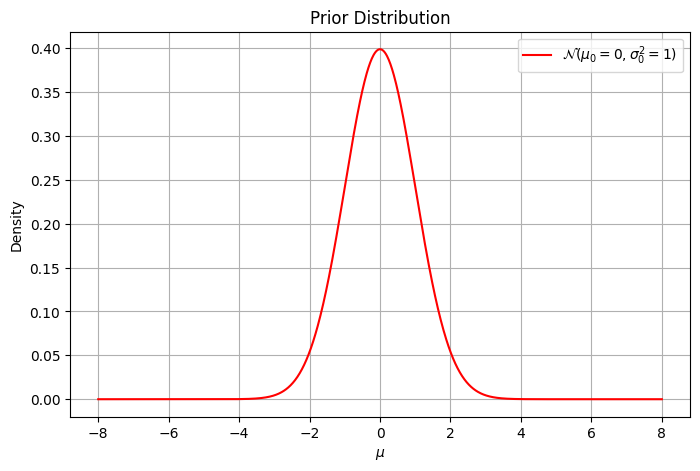

In [ ]:
# fill me

# parameter
mu_0 = 0  # prior mean
sigma_0 = 1  # prior sd

# axis range
x = np.linspace(-8, 8, 1000)

# density
y = norm.pdf(x, mu_0, sigma_0)

# prior
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$\mathcal{N}(\mu_0=0, \sigma_0^2=1)$', color='red')
plt.xlabel(r'$\mu$')
plt.ylabel('Density')
plt.title('Prior Distribution')
plt.legend()
plt.grid()

# display the img
plt.show()


<font color="blue">
The prior distribution is centered at x = 0, and drops quickly beyond (+/-) 3 sigma.
</font>

In [ ]:
# define update function
def update_posterior(mu_0, sigma_0_squared, x_s, sigma_x_squared, x_min, x_max):
    """
    This function updates the posterior distribution given a new data point.
    ---
    INPUTS:
    mu_0: prior mean, numeric
    sigma_0_squared: prior variance, numeric
    x_s: list of data points, numpy array
    sigma_x_squared: likelihood variance, numeric
    x_min: minimum x value, numeric
    x_max: maximum x value, numeric
    ---
    OUTPUTS:
    posterior_pdf: posterior distribution, numpy array
    predictive_pdf: predictive distribution, numpy array
    """
    n = len(x_s)
    # posterior parameters
    posterior_mu = (mu_0 / sigma_0_squared + sum(x_s) / sigma_x_squared) / (1 / sigma_0_squared + n / sigma_x_squared)
    posterior_sigma_squared = 1 / (1 / sigma_0_squared + n / sigma_x_squared)
    posterior_sigma = np.sqrt(posterior_sigma_squared)

    # predictive parameters
    predictive_mu = posterior_mu
    predictive_sigma_squared = posterior_sigma_squared + sigma_x_squared
    predictive_sigma = np.sqrt(predictive_sigma_squared)

    # axis range
    x_range = np.linspace(x_min, x_max, 1000)

    # distributions
    posterior_pdf = norm.pdf(x_range, posterior_mu, posterior_sigma)
    predictive_pdf = norm.pdf(x_range, predictive_mu, predictive_sigma)

    return posterior_mu, posterior_pdf, predictive_mu, predictive_pdf

### 1. (b) One Datum update
Calculate and plot the posterior and predictive distributions after observing $x_1=2$ for $\sigma_x^2 = 0.25$ and $\sigma_x^2=4$ (that is 4 different distributions: the posterior and predictive for $\sigma_x^2=0.25$ and the posterior and predictive for $\sigma_x^2=4$). How does changing the variance of the likelihood affect the distributions? Are there any differences? Why?

<font color="blue">
According to the update formula for posterior distributions, a smaller variance in the likelihood results in greater shrinkage, concentrating the posterior distribution more sharply around its peak. Consequently, the new posterior mean moves closer to the mean of the observed data, as it is a weighted average of the prior mean and the data mean, with the degree of influence determined by the variances (sigmas) of the prior and likelihood.
</font>

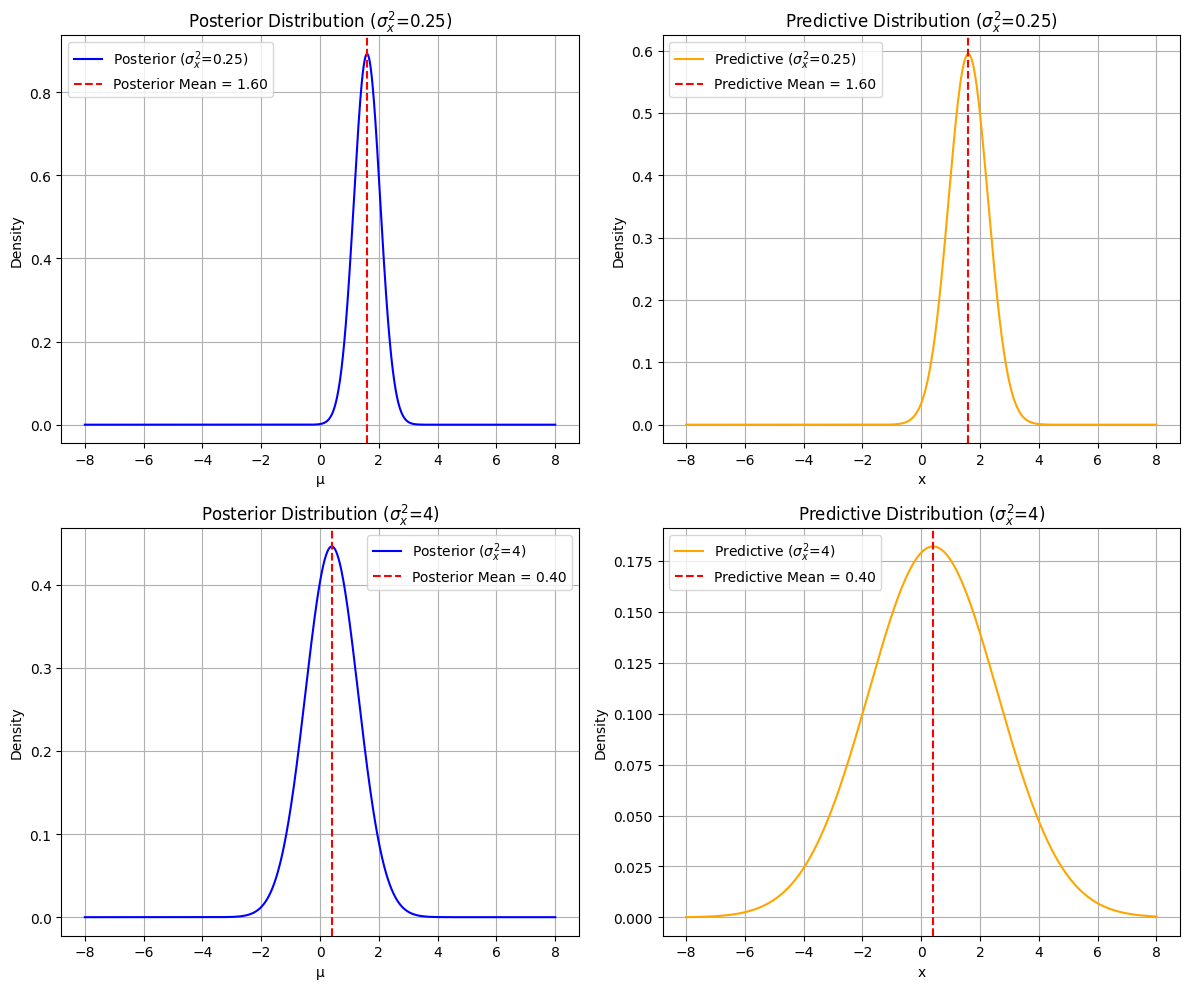

In [ ]:
# fill me

# prior parameters
mu_0 = 0
sigma_0_squared = 1

# obs
x_1 = 2

# likelihood sd
sigma_x_squared_values = [0.25, 4]

# canvas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, sigma_x_squared in enumerate(sigma_x_squared_values):
    # x range
    x_min = -8
    x_max = 8
    x_range = np.linspace(x_min, x_max, 1000)
    # update
    posterior_mu, posterior_pdf, predictive_mu, predictive_pdf = update_posterior(mu_0, sigma_0_squared, [x_1], sigma_x_squared, x_min, x_max)

    # posterior distribution
    axes[i, 0].plot(x_range, posterior_pdf, label=f'Posterior ($\sigma_x^2$={sigma_x_squared})', color='blue')
    axes[i, 0].axvline(posterior_mu, color='red', linestyle='--', label=f'Posterior Mean = {posterior_mu:.2f}')
    axes[i, 0].set_title(f'Posterior Distribution ($\sigma_x^2$={sigma_x_squared})')
    axes[i, 0].set_xlabel('μ')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].legend()
    axes[i, 0].grid()

    # predictive distribution
    axes[i, 1].plot(x_range, predictive_pdf, label=f'Predictive ($\sigma_x^2$={sigma_x_squared})', color='orange')
    axes[i, 1].axvline(predictive_mu, color='red', linestyle='--', label=f'Predictive Mean = {predictive_mu:.2f}')
    axes[i, 1].set_title(f'Predictive Distribution ($\sigma_x^2$={sigma_x_squared})')
    axes[i, 1].set_xlabel('x')
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].legend()
    axes[i, 1].grid()

# display
plt.tight_layout()
plt.show()


<font color="blue">
The updated posterior and predictive distributions with larger likelihood variance are more dispersed, and the predictive is more dispersed than the posterior. The updated mean (center of the distributions) is closer to prior with larger likelihood variance, and closer to the data mean with smaller likelihood variance. The reason has been discussed above, that the posterior variance is the inverse of $\frac{1}{\sigma_0^2}+\frac{N}{\sigma_x^2}$, which will be smaller when (1) given N, smaller likelihood variance or (2) given likelihood variance, larger N. Here the N is the same, so the dispersion of the likelihood determines that of the posterior. And the updated mean the weighted mean of the prior and the data mean, modulated by the dispersion. So, the more disperse the likelihood, the closer the posterior mean to the prior.
</font>

### 1. (c) Multiple data update
Calculate and plot the posterior and predictive distributions given $(x_1,\dotsc, x_5) = (2.1, 2.5, 1.4, 2.2, 1.8)$ for $\sigma_x^2 = 0.25$ and $\sigma_x^2 = 4$. How does this  compare to the previous example? Note that the average of the data points is 2, and so both contribute the same average value. For cases that differ, why do they differ then? For those that do not, why don't they differ?


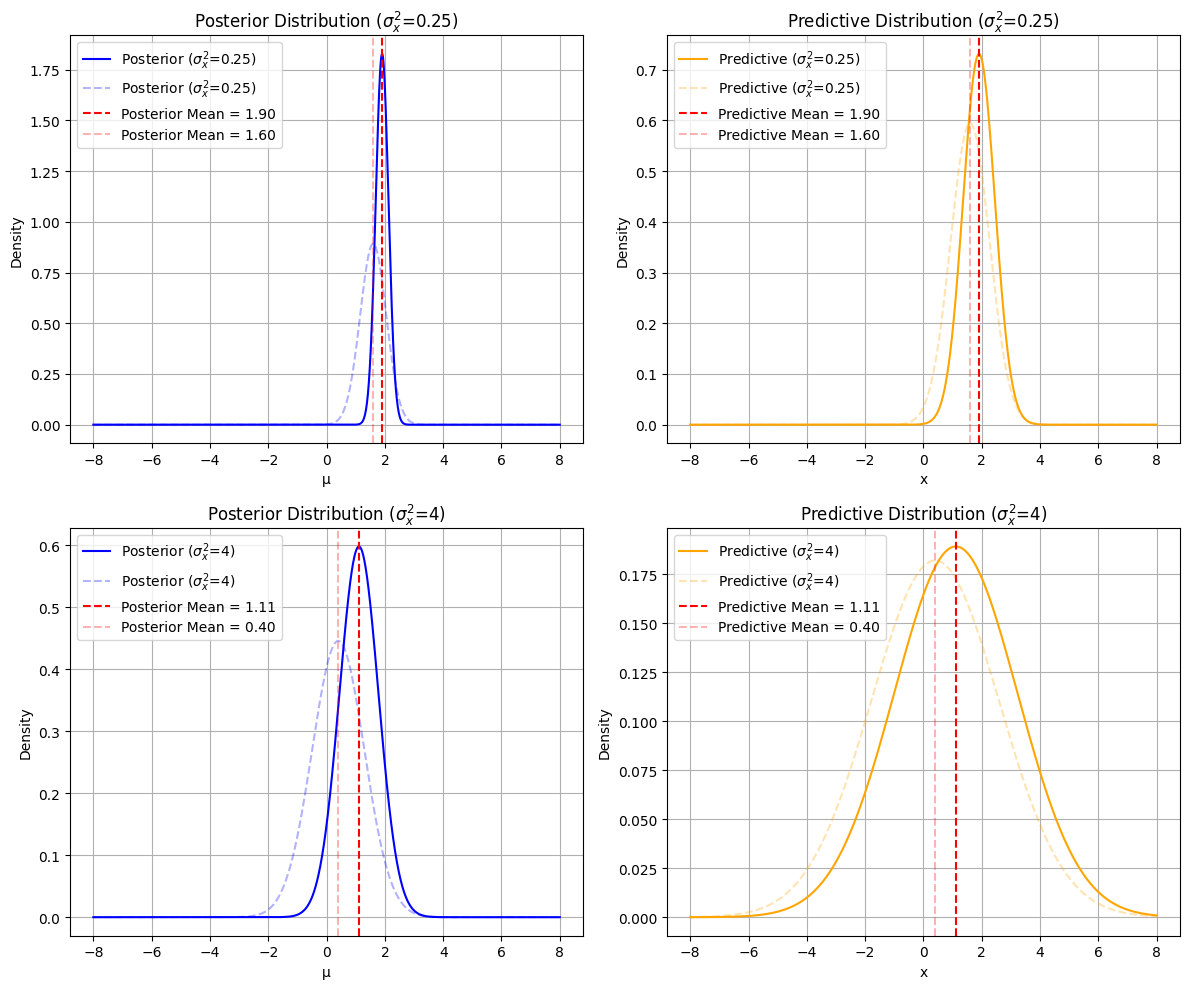

In [ ]:
# fill me

# prior
mu_0 = 0
sigma_0_squared = 1

# obs
x_values = np.array([2.1, 2.5, 1.4, 2.2, 1.8])
N = len(x_values)

# likelihood sd
sigma_x_squared_values = [0.25, 4]

# canvas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, sigma_x_squared in enumerate(sigma_x_squared_values):
    # update
    posterior_mu_1, posterior_pdf_1, predictive_mu_1, predictive_pdf_1 = update_posterior(mu_0, sigma_0_squared, [x_1], sigma_x_squared, x_min, x_max)
    posterior_mu, posterior_pdf, predictive_mu, predictive_pdf = update_posterior(mu_0, sigma_0_squared, x_values, sigma_x_squared, x_min, x_max)

    # posterior distribution
    axes[i, 0].plot(x_range, posterior_pdf, label=f'Posterior ($\sigma_x^2$={sigma_x_squared})', color='blue')
    axes[i, 0].plot(x_range, posterior_pdf_1, label=f'Posterior ($\sigma_x^2$={sigma_x_squared})', color='blue', alpha=0.3, linestyle='--')
    axes[i, 0].axvline(posterior_mu, color='red', linestyle='--', label=f'Posterior Mean = {posterior_mu:.2f}')
    axes[i, 0].axvline(posterior_mu_1, color='red', linestyle='--', label=f'Posterior Mean = {posterior_mu_1:.2f}', alpha=0.3)
    axes[i, 0].set_title(f'Posterior Distribution ($\sigma_x^2$={sigma_x_squared})')
    axes[i, 0].set_xlabel('μ')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].legend()
    axes[i, 0].grid()

    # predictive distribution
    axes[i, 1].plot(x_range, predictive_pdf, label=f'Predictive ($\sigma_x^2$={sigma_x_squared})', color='orange')
    axes[i, 1].plot(x_range, predictive_pdf_1, label=f'Predictive ($\sigma_x^2$={sigma_x_squared})', color='orange', alpha=0.3, linestyle='--')
    axes[i, 1].axvline(predictive_mu, color='red', linestyle='--', label=f'Predictive Mean = {predictive_mu:.2f}')
    axes[i, 1].axvline(predictive_mu_1, color='red', linestyle='--', label=f'Predictive Mean = {predictive_mu_1:.2f}', alpha=0.3)
    axes[i, 1].set_title(f'Predictive Distribution ($\sigma_x^2$={sigma_x_squared})')
    axes[i, 1].set_xlabel('x')
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].legend()
    axes[i, 1].grid()

# display
plt.tight_layout()
plt.show()


<font color="blue">
As discussed above, given a certain likelihood variance, the larger the number of the data point, the less dispersed the posterior and preditive, and the closer the centers of the distributions to the data mean (2).
</font>